## Gaussian Processes

### Neil D. Lawrence

### 12th May 2016

In [1]:
import numpy as np
import pandas as pd
import pods
import matplotlib.pyplot as plt
import mlai
import teaching_plots as plot 
%matplotlib inline

<img src="./diagrams/9780262182539-f30.jpg">
@Rasmussen:book06

### What is Machine Learning?

$$ \text{data} + \text{model} = \text{prediction}$$

-   $\text{data}$ : observations, could be actively or passively
    acquired (meta-data).

-   $\text{model}$ : assumptions, based on previous experience (other data!
    transfer learning etc), or beliefs about the regularities of
    the universe. Inductive bias.

-   $\text{prediction}$ : an action to be taken or a categorization or a
    quality score.

### Olympic Marathon Data

-   Gold medal times for Olympic Marathon since 1896.

-   Marathons before 1924 didn’t have a standardised distance.

-   Present results using pace per km.

-   In 1904 Marathon was badly organised leading to very slow times.

![image](./diagrams/Stephen_Kiprotich.jpg)
Image from Wikimedia Commons <http://bit.ly/16kMKHQ>

### Olympic Marathon Data

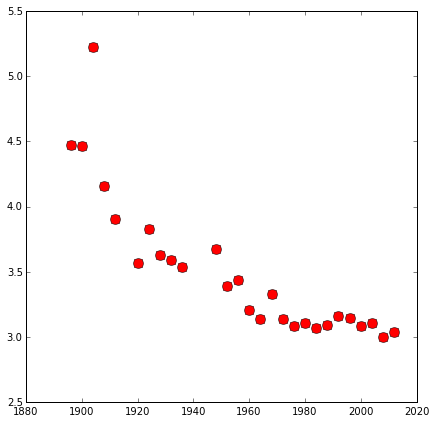

In [2]:
data = pods.datasets.olympic_marathon_men()
f, ax = plt.subplots(figsize=(7,7))
ax.plot(data['X'], data['Y'], 'ro',markersize=10)

# Overdetermined System

![](diagrams/straight_line7.svg)

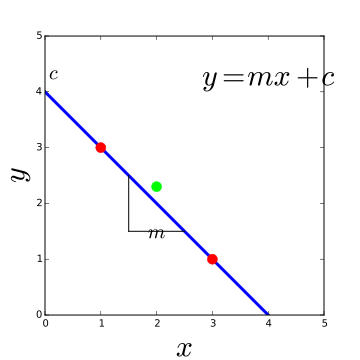

In [3]:
pods.notebook.display_plots('straight_line{samp}.svg', directory='./diagrams', samp=(1, 7))

# $y = mx + c$

point 1: $x = 1$, $y=3$ $$3 = m + c$$ 
point 2: $x = 3$, $y=1$ $$1 = 3m + c$$ 
point 3: $x = 2$, $y=2.5$ $$2.5 = 2m + c$$

<img src="diagrams/Pierre-Simon_Laplace.png" align=center width=50%>

<img src="diagrams/LaplacesDeterminismFrench.png" align=center width=50%>

<img src="diagrams/LaplacesDeterminismEnglish.png" align=center width=50%>

<img src="diagrams/philosophicaless00lapliala.png" align=center width=50%>

# $y = mx + c + \epsilon$

point 1: $x = 1$, $y=3$ 
$$3 = m + c + \epsilon_1$$ 

point 2: $x = 3$, $y=1$ 
$$1 = 3m + c + \epsilon_2$$ 

point 3: $x = 2$, $y=2.5$ 
$$2.5 = 2m + c + \epsilon_3$$

### The Gaussian Density
- Perhaps the most common probability density.
\begin{align*}
p(y| \mu, \sigma^2) & = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y - \mu)^2}{2\sigma^2}\right)\\
& \buildrel\triangle\over = \mathcal{N}(y|\mu, \sigma^2)
\end{align*}
- The Gaussian density.


/Users/neil/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


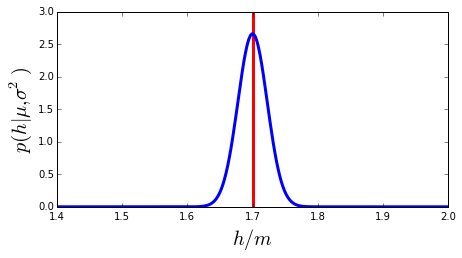

In [4]:
plot.gaussian_height()

### Gaussian Density
![](./diagrams/gaussian_of_height.svg)
The Gaussian PDF with $\mu=1.7$ and variance $\sigma^2=
  0.0225$. Mean shown as red line. It could represent the heights of a population of
  students.

### Gaussian Density
$$
\mathcal{N}(y|\mu, \sigma^2) =  \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y-\mu)^2}{2\sigma^2}\right)
$$
$\sigma^2$ is the variance of the density and $\mu$ is the mean.



### Two Important Gaussian Properties

**Sum of Gaussian**

-   Sum of Gaussian variables is also Gaussian.
    $$y_i \sim \mathcal{N}(\mu, \sigma^2)$$ 
    And the sum is distributed as
    $$\sum_{i=1}^{n} y_i \sim \mathcal{N}\left(\sum_{i=1}^n \mu_i,\sum_{i=1}^n \sigma_i^2\right)$$
    (*Aside*: As sum increases, sum of non-Gaussian, finite variance variables is
    also Gaussian [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).)

### Two Important Gaussian Properties

**Scaling a Gaussian**

-   Scaling a Gaussian leads to a Gaussian.
    $$y \sim \mathcal{N}(\mu, \sigma^2)$$
    And the scaled density is distributed as
    $$w y \sim \mathcal{N}(w\mu,w^2 \sigma^2)$$

### Laplace's Idea

### A Probabilistic Process

-   Set the mean of Gaussian to be a function.
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp \left(-\frac{\left(y_i-f\left(x_i\right)\right)^{2}}{2\sigma^2}\right).$$

-   This gives us a ‘noisy function’.

-   This is known as a stochastic process.

### Height as a Function of Weight

-   In the standard Gaussian, parametized by mean and variance.

-   Make the mean a linear function of an *input*.

-   This leads to a regression model. 
    \begin{align*}
       y_i=&f\left(x_i\right)+\epsilon_i,\\
         \epsilon_i \sim &\mathcal{N}(0, \sigma^2).
     \end{align*}
        
-   Assume $y_i$ is height and $x_i$ is weight.

### Data Point Likelihood

-   Likelihood of an individual data point
    $$p\left(y_i|x_i,\sigma^2,f()\right)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-\frac{\left(y_i-f(x_i)\right)^{2}}{2\sigma^2}\right).$$

-   If $f(x_i) = mx_i + c$ then parameters are gradient, $m$, offset, $c$ of the function and noise
    variance $\sigma^2$.

### Data Set Likelihood

-   If the noise, $\epsilon_i$ is sampled independently for each
    data point.

-   Each data point is independent (given $m$ and $c$).

-   For independent variables:
    $$p(\mathbf{y}) = \prod_{i=1}^n p(y_i)$$
    $$p(\mathbf{y}|\mathbf{x}, m, c) = \prod_{i=1}^n p(y_i|x_i, m, c)$$
    

### Two Simultaneous Equations

A system of two simultaneous equations with two
unknowns.

How do we deal with three simultaneous
equations with only two unknowns?

$$\begin{aligned}
        y_1 = & mx_1 + c\\
        y_2 = & mx_2 + c
      \end{aligned}$$ 
      
$$\begin{aligned}
        y_1-y_2 = & m(x_1 - x_2)
      \end{aligned}$$  
      
$$\begin{aligned}
        \frac{y_1-y_2}{x_1 - x_2} = & m
      \end{aligned}$$ 
      
$$\begin{aligned}
        m & =\frac{y_2-y_1}{x_2 - x_1}\\
        c & = y_1 - m x_1
      \end{aligned}$$ 
      
$$\begin{aligned}
        y_1 = & mx_1 + c\\
        y_2 = & mx_2 + c\\
        y_3 = & mx_3 + c
      \end{aligned}$$

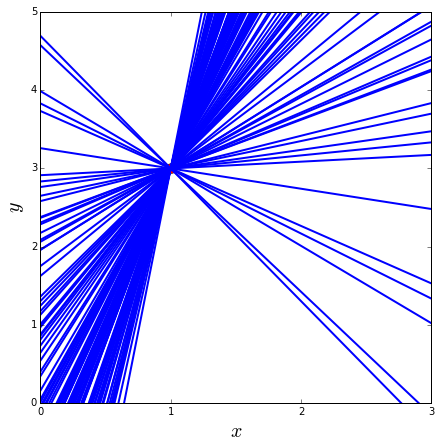

In [5]:
plot.under_determined_system()

### Underdetermined System
- What about two unknowns and *one* observation?
    $$y_1 =  mx_1 + c$$

## Underdetermined System

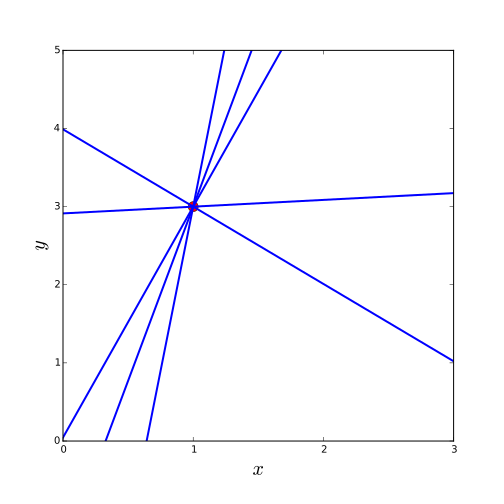

In [6]:
pods.notebook.display_plots('one_point{samp}.svg', directory='./diagrams', samp=(0, 10))

### Underdetermined System
- Can compute $m$ given $c$.
$$m = \frac{y_1 -c}{x}$$

### Underdetermined System

- Can compute $m$ given $c$.

Assume 
$$c \sim \mathcal{N}(0, 4),$$

### Overdetermined System

-   With two unknowns and two observations: 
    $$\begin{aligned}
          y_1 = & mx_1 + c\\
          y_2 = & mx_2 + c
        \end{aligned}$$

-   Additional observation leads to *overdetermined* system.
    $$y_3 =  mx_3 + c$$

-   This problem is solved through a noise model
    $\epsilon \sim \mathcal{N}(0,\sigma^2)$ $$\begin{aligned}
          y_1 = mx_1 + c + \epsilon_1\\
          y_2 = mx_2 + c + \epsilon_2\\
          y_3 = mx_3 + c + \epsilon_3
        \end{aligned}$$

### Noise Models

-   We aren’t modeling entire system.

-   Noise model gives mismatch between model and data.

-   Gaussian model justified by appeal to central limit theorem.

-   Other models also possible (Student-$t$ for heavy tails).

-   Maximum likelihood with Gaussian noise leads to *least squares*.

### Different Types of Uncertainty

-   The first type of uncertainty we are assuming is
    *aleatoric* uncertainty.

-   The second type of uncertainty we are assuming is
    *epistemic* uncertainty.

### Aleatoric Uncertainty

-   This is uncertainty we couldn’t know even if we wanted to. e.g. the
    result of a football match before it’s played.

-   Where a sheet of paper might land on the floor.

### Epistemic Uncertainty

-   This is uncertainty we could in principal know the answer too. We
    just haven’t observed enough yet, e.g. the result of a football
    match *after* it’s played.

-   What colour socks your lecturer is wearing.

### Prior Distribution

-   Bayesian inference requires a prior on the parameters.

-   The prior represents your belief *before* you see the data of the
    likely value of the parameters.

-   For linear regression, consider a Gaussian prior on the intercept:
    $$c \sim \mathcal{N}(0, \alpha_1)$$

### Posterior Distribution

-   Posterior distribution is found by combining the prior with
    the likelihood.

-   Posterior distribution is your belief *after* you see the data of
    the likely value of the parameters.

-   The posterior is found through **Bayes’ Rule**
    $$p(c|y) = \frac{p(y|c)p(c)}{p(y)}$$


### Bayes Update

/Users/neil/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


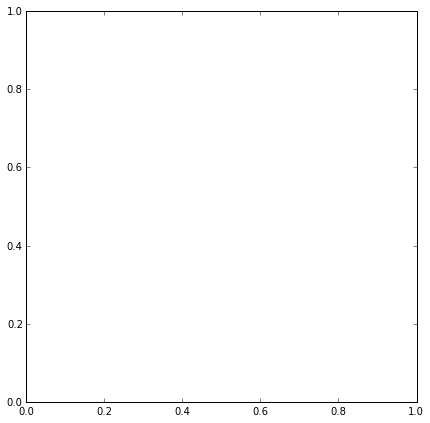

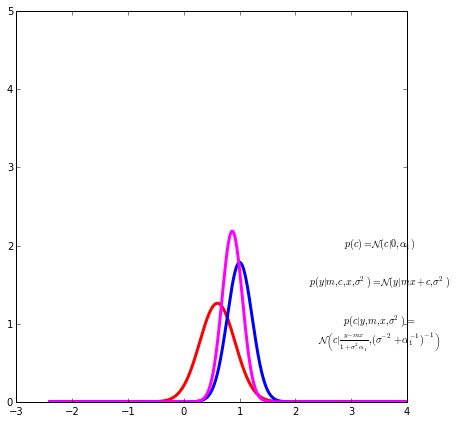

In [7]:
plot.bayes_update()

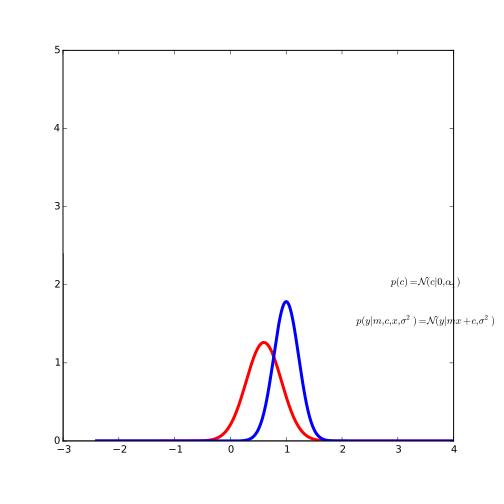

In [8]:
pods.notebook.display_plots('dem_gaussian{stage}.svg', './diagrams/', stage=(1, 3))

### Stages to Derivation of the Posterior

-   Multiply likelihood by prior

    -   they are "exponentiated quadratics", the answer is always also
        an exponentiated quadratic because
        $$\exp(a^2)\exp(b^2) = \exp(a^2 + b^2)$$

-   Complete the square to get the resulting density in the form of
    a Gaussian.

-   Recognise the mean and (co)variance of the Gaussian. This is the
    estimate of the posterior.

### Main Trick

$$p(c) = \frac{1}{\sqrt{2\pi\alpha_1}} \exp\left(-\frac{1}{2\alpha_1}c^2\right)$$
$$p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2) = \frac{1}{\left(2\pi\sigma^2\right)^{\frac{n}{2}}} \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i - mx_i - c)^2\right)$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) = \frac{p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)}{p(\mathbf{y}|\mathbf{x}, m, \sigma^2)}$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) =  \frac{p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)}{\int p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c) \text{d} c}$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) \propto  p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)$$

$$\begin{aligned}
    \log p(c | \mathbf{y}, \mathbf{x}, m, \sigma^2) =&-\frac{1}{2\sigma^2} \sum_{i=1}^n(y_i-c - mx_i)^2-\frac{1}{2\alpha_1} c^2 + \text{const}\\
     = &-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i-mx_i)^2 -\left(\frac{n}{2\sigma^2} + \frac{1}{2\alpha_1}\right)c^2\\
    & + c\frac{\sum_{i=1}^n(y_i-mx_i)}{\sigma^2},
  \end{aligned}$$

complete the square of the quadratic form to obtain
$$\log p(c | \mathbf{y}, \mathbf{x}, m, \sigma^2) = -\frac{1}{2\tau^2}(c - \mu)^2 +\text{const},$$
where $\tau^2 = \left(n\sigma^{-2} +\alpha_1^{-1}\right)^{-1}$
and
$\mu = \frac{\tau^2}{\sigma^2} \sum_{i=1}^n(y_i-mx_i)$.

### The Joint Density

-   Really want to know the *joint* posterior density over the
    parameters $c$ *and* $m$.

-   Could now integrate out over $m$, but it’s easier to consider the
    multivariate case.

### Sampling a Function

**Multi-variate Gaussians**

* We will consider a Gaussian with a particular structure of covariance
    matrix.
* Generate a single sample from this 25 dimensional Gaussian distribution, $\mathbf{f}=\left[f_{1},f_{2}\dots f_{25}\right]$.

* We will plot these points against their index.


In [9]:
# %load -s compute_kernel mlai.py
def compute_kernel(X, X2, kernel, **kwargs):
    K = np.zeros((X.shape[0], X2.shape[0]))
    for i in np.arange(X.shape[0]):
        for j in np.arange(X2.shape[0]):
            K[i, j] = kernel(X[i, :], X2[j, :], **kwargs)
        
    return K


In [10]:
# %load -s polynomial_cov mlai.py
def polynomial_cov(x, x_prime, variance=1., degree=2., w=1., b=1.):
    "Polynomial covariance function."
    return variance*(np.dot(x, x_prime)*w + b)**degree


In [11]:
# %load -s exponentiated_quadratic mlai.py
def exponentiated_quadratic(x, x_prime, variance=1., lengthscale=1.):
    "Exponentiated quadratic covariance function."
    squared_distance = ((x-x_prime)**2).sum()
    return variance*np.exp((-0.5*squared_distance)/lengthscale**2)        


/Users/neil/sods/gpss/slides/teaching_plots.py:450: RuntimeWarning: covariance is not positive-semidefinite.
  f = np.random.multivariate_normal(np.zeros(25), K, size=1)


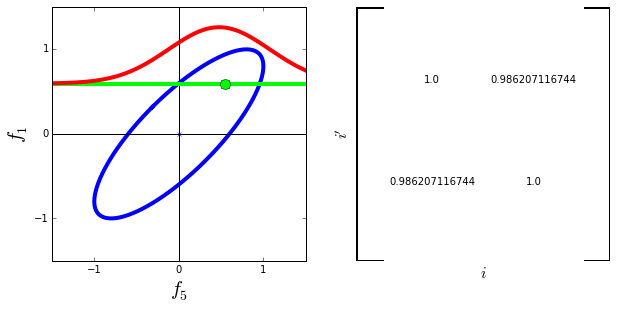

In [12]:
plot.dem_two_point_sample(compute_kernel, kernel=exponentiated_quadratic, lengthscale=0.5)


## Gaussian Samples

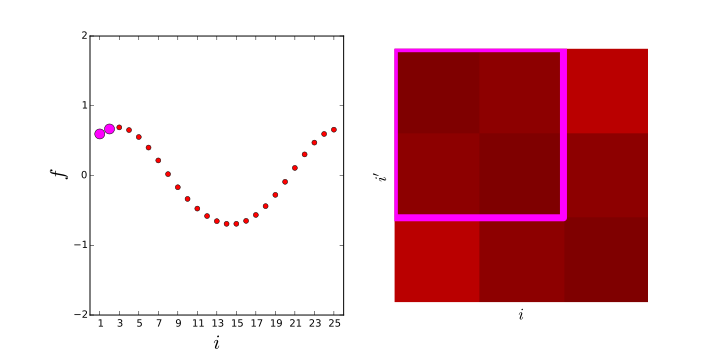

In [13]:
pods.notebook.display_plots('dem_two_point_sample{sample}.svg', './diagrams/', sample=(0,12))

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Uluru_Panorama.jpg/799px-Uluru_Panorama.jpg" alignment='center'>

## Prediction with Correlated Gaussians
  * Prediction of $f_2$ from $f_1$ requires *conditional density*.
  * Conditional density is *also* Gaussian.
    $$
    p(f_2|f_1) = \mathcal{N}\left(f_2|\frac{k_{1, 2}}{k_{1, 1}}f_1, k_{2, 2} - \frac{k_{1,2}^2}{k_{1,1}}\right)
    $$
    where covariance of joint density is given by
    $$
    \mathbf{K} = \begin{bmatrix} k_{1, 1} & k_{1, 2}\\ k_{2, 1} & k_{2, 2}\end{bmatrix}
    $$

## Gaussian Samples

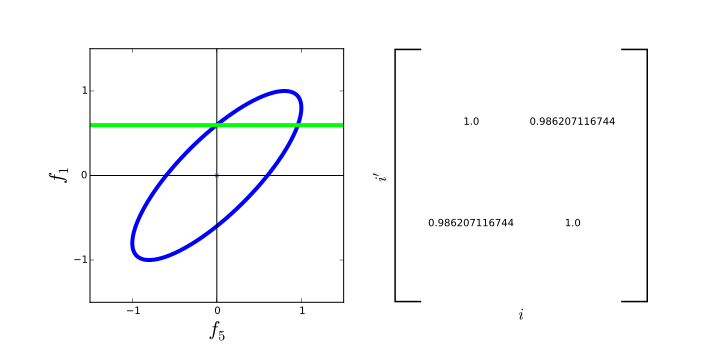

In [14]:
pods.notebook.display_plots('dem_two_point_sample{sample}.svg', './diagrams/', sample=(13,16))

## Prediction with Correlated Gaussians
  * Prediction of $\mathbf{f}_*$ from $\mathbf{f}$ requires multivariate *conditional density*.
  * Multivariate conditional density is *also* Gaussian.
    $$
    p(\mathbf{f}_*|\mathbf{f}) = \mathcal{N}\left(\mathbf{f}_*|\mathbf{K}_{*,\mathbf{f}}\mathbf{K}_{\mathbf{f},\mathbf{f}}^{-1}\mathbf{f},\mathbf{K}_{*,*}-\mathbf{K}_{*,\mathbf{f}} \mathbf{K}_{\mathbf{f},\mathbf{f}}^{-1}\mathbf{K}_{\mathbf{f},*}\right)
    $$

## Prediction with Correlated Gaussians
  * Prediction of $\mathbf{f}_*$ from $\mathbf{f}$ requires multivariate *conditional density*.
  * Multivariate conditional density is *also* Gaussian.
    $$
    p(\mathbf{f}_*|\mathbf{f}) = \mathcal{N}\left(\mathbf{f}_*|\boldsymbol{\mu},\boldsymbol{\Sigma}\right)
    $$
    $$
    \boldsymbol{\mu} = \mathbf{K}_{*,\mathbf{f}}\mathbf{K}_{\mathbf{f},\mathbf{f}}^{-1}\mathbf{f}     
    $$
    $$
    \boldsymbol{\Sigma} = \mathbf{K}_{*,*}-\mathbf{K}_{*,\mathbf{f}} \mathbf{K}_{\mathbf{f},\mathbf{f}}^{-1}\mathbf{K}_{\mathbf{f},*}
    $$
  * Here covariance of joint density is given by
    $$
    \mathbf{K} = \begin{bmatrix} \mathbf{K}_{\mathbf{f}, \mathbf{f}} & \mathbf{K}_{*, \mathbf{f}}\\ \mathbf{K}_{\mathbf{f}, *} & \mathbf{K}_{*, *}\end{bmatrix}
    $$
  

## Where Did This Covariance Matrix Come From?
$$
k(\mathbf{x}, \mathbf{x}^\prime) = \alpha \exp\left(-\frac{\left\Vert \mathbf{x} - \mathbf{x}^\prime\right\Vert^2_2}{2\ell^2}\right)$$

<table cellspacing="0" cellpadding="0" border="none">
<tr><td>
<ul><li>Covariance matrix is
built using the *inputs* to
the function x.</li>

<li>For the example above it
was based on Euclidean
distance.</li>

<li>The covariance function
is also know as a kernel.</li>
</ul></td><td><img src='./diagrams/eq_covariance.svg' align='right'></td></tr>
</table>

## Where Did This Covariance Matrix Come From?
$$
k(\mathbf{x}, \mathbf{x}^\prime) = \alpha \exp\left(-\frac{\left\Vert \mathbf{x} - \mathbf{x}^\prime\right\Vert^2_2}{2\ell^2}\right)$$

<table cellspacing="0" cellpadding="0" border="none">
<tr><td>
<ul><li>Covariance matrix is
built using the *inputs* to
the function x.</li>

<li>For the example above it
was based on Euclidean
distance.</li>

<li>The covariance function
is also know as a kernel.</li>
</ul></td><td><img src='./diagrams/eq_covariance.gif' align='right'></td></tr>
</table>

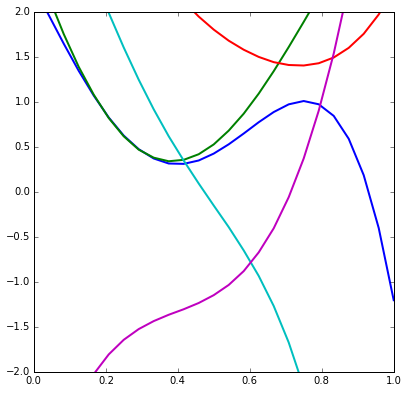

In [15]:
x = np.linspace(-1, 1, 25)[:, None]
out = plot.covariance_func(x, compute_kernel, formula = '$$k(\mathbf{x}, \mathbf{x}^\prime) = \alpha(w \mathbf{x}^\top \mathbf{x}^\prime + b)^d$$', shortname='poly', 
                     longname='Polynomial', kernel=polynomial_cov,
                     degree=4.)

In [16]:
from IPython.display import HTML
HTML(out)

,


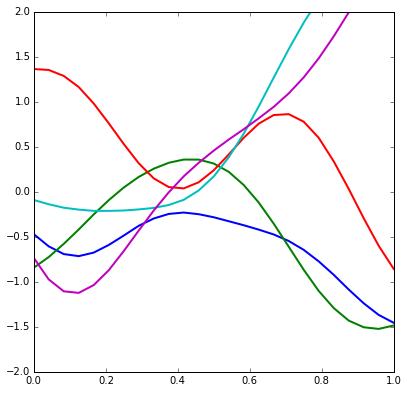

In [17]:
out = plot.covariance_func(x, compute_kernel, formula = '$$k(\mathbf{x}, \mathbf{x}^\prime) = \alpha \exp\left(-\frac{\left\Vert \mathbf{x} - \mathbf{x}^\prime\right\Vert^2_2}{2\ell^2}\right)$$', shortname='eq', 
                     longname='Exponentiated Quadratic', kernel=exponentiated_quadratic,
                     lengthscale=0.5)

In [18]:
from IPython.display import HTML
HTML(out)

,


### Gaussian Distribution Sample
  


## Extremely Short Overview


## Log Odds

* model the *log-odds* with the basis functions.
* [odds](http://en.wikipedia.org/wiki/Odds) are defined as the ratio of the probability of a positive outcome, to the probability of a negative outcome. 
* Probability is between zero and one, odds are:
    $$ \frac{\pi}{1-\pi} $$
* Odds are between $0$ and $\infty$. 
* Logarithm of odds maps them to $-\infty$ to $\infty$.

### Logit Link Function

* The [Logit function](http://en.wikipedia.org/wiki/Logit), $$g^{-1}(\pi_i) = \log\frac{\pi_i}{1-\pi_i}.$$ This function is known as a *link function*.

* For a standard regression we take,
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i),$$
* For classification we perform a logistic regression. 
    $$\log \frac{\pi_i}{1-\pi_i} = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)$$

### Inverse Link Function

We have defined the link function as taking the form $g^{-1}(\cdot)$ implying that the inverse link function is given by $g(\cdot)$. Since we have defined,
$$
g^{-1}(\pi(\mathbf{x})) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})
$$
we can write $\pi$ in terms of the *inverse link* function, $g(\cdot)$ as 
$$
\pi(\mathbf{x}) = g(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})).
$$

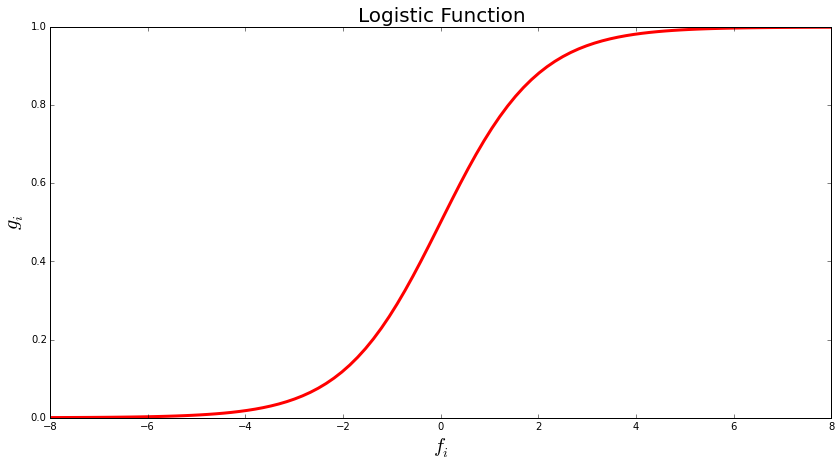

In [19]:
plot.logistic()

### Logistic function

* [Logistic](http://en.wikipedia.org/wiki/Logistic_function) (or sigmoid) squashes real line to between 0   & 1. Sometimes also called a 'squashing function'. 
![](./diagrams/logistic.svg)


### Prediction Function
* Can now write $\pi$ as a function of the input and the parameter vector as, $$\pi(\mathbf{x},\mathbf{w}) = \frac{1}{1+ \exp\left(-\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})\right)}.$$

* Compute the output of a standard linear basis function composition ($\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})$, as we did for linear regression)

* Apply the inverse link function, $g(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}))$. 

* Use this value in a Bernoulli distribution to form the likelihood. 

### Bernoulli Reminder

$$P(y_i|\mathbf{w}, \mathbf{x}) = \pi_i^{y_i} (1-\pi_i)^{1-y_i}$$

* Trick for switching betwen probabilities
```python
def bernoulli(y, pi):
    if y == 1:
        return pi
    else:
        return 1-pi
```

### Maximum Likelihood


* Conditional independence of data:$$P(\mathbf{y}|\mathbf{w}, \mathbf{X}) = \prod_{i=1}^n P(y_i|\mathbf{w}, \mathbf{x}_i). $$

### Log Likelihood

\begin{align*}
\log P(\mathbf{y}|\mathbf{w}, \mathbf{X}) = & \sum_{i=1}^n \log P(y_i|\mathbf{w}, \mathbf{x}_i) \\ = &\sum_{i=1}^n y_i \log \pi_i \\ & + \sum_{i=1}^n (1-y_i)\log (1-\pi_i)
\end{align*}

### Objective Function

* Probability of positive outcome for the $i$th data point $$\pi_i = g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)\right),$$ where $g(\cdot)$ is the *inverse* link function

* Objective function of the form \begin{align*}
E(\mathbf{w}) = & -  \sum_{i=1}^n y_i \log g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)\right) \\& - \sum_{i=1}^n(1-y_i)\log \left(1-g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)\right)\right).
\end{align*}

### Minimize Objective

* Grdient wrt  $\pi(\mathbf{x};\mathbf{w})$ 
\begin{align*}
\frac{\text{d}E(\mathbf{w})}{\text{d}\mathbf{w}} = & -\sum_{i=1}^n \frac{y_i}{g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})\right)}\frac{\text{d}g(f_i)}{\text{d}f_i} \boldsymbol{\phi(\mathbf{x}_i)} \\ & +  \sum_{i=1}^n \frac{1-y_i}{1-g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})\right)}\frac{\text{d}g(f_i)}{\text{d}f_i} \boldsymbol{\phi(\mathbf{x}_i)}
\end{align*}

### Link Function Gradient

* Also need gradient of inverse link function wrt parameters.
\begin{align*}
g(f_i) &= \frac{1}{1+\exp(-f_i)}\\
&=(1+\exp(-f_i))^{-1}
\end{align*}
and the gradient can be computed as
\begin{align*}
\frac{\text{d}g(f_i)}{\text{d} f_i} & = \exp(-f_i)(1+\exp(-f_i))^{-2}\\
& = \frac{1}{1+\exp(-f_i)} \frac{\exp(-f_i)}{1+\exp(-f_i)} \\
& = g(f_i) (1-g(f_i))
\end{align*}

### Objective Gradient

\begin{align*}
\frac{\text{d}E(\mathbf{w})}{\text{d}\mathbf{w}} = & -\sum_{i=1}^n y_i\left(1-g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})\right)\right) \boldsymbol{\phi(\mathbf{x}_i)} \\ & + \sum_{i=1}^n (1-y_i)\left(g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})\right)\right) \boldsymbol{\phi(\mathbf{x}_i)}.
\end{align*}

### Optimization of the Function

* Can't find a stationary point of the objective function analytically.

* Optimization has to proceed by *numerical methods*. 
    * [Newton's method](http://en.wikipedia.org/wiki/Newton%27s_method) or 
    * [gradient based optimization methods](http://en.wikipedia.org/wiki/Gradient_method) 
    
* Similarly to matrix factorization, for large data *stochastic gradient descent*  (Robbins Munroe optimization procedure) works well. 

### Ad Matching for Facebook

* This approach used in many internet companies.

* Example: ad matching for Facebook.
    * Millions of advertisers
    * Billions of users
    * How do you choose who to show what?
    
* Logistic regression used in combination with [decision trees]()

* [Paper available here](http://www.herbrich.me/papers/adclicksfacebook.pdf)

### Other GLMs

* Logistic regression is part of a family known as *generalized linear models*

* They all take the form $$g^{-1}(f_i(x)) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)$$

* As another example let's look at *Poisson regression*.



### Poisson Distribution

* Poisson distribution is used for 'count data'. For non-negative integers, $y$, $$P(y) = \frac{\lambda^y}{y!}\exp(-y)$$

* Here $\lambda$ is a *rate* parameter that can be thought of as the number of arrivals per unit time.

* Poisson distributions can be used for disease count data. E.g. number of incidence of malaria in a district.


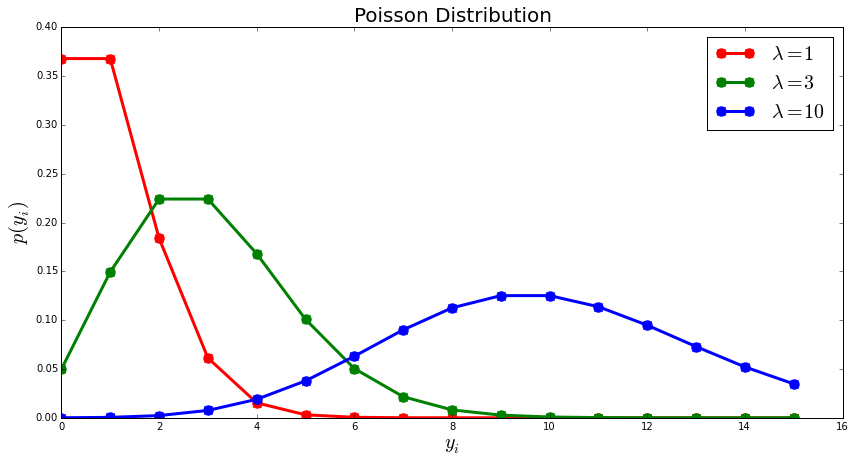

In [20]:
plot.poisson()

### Poisson Distribution

![](./diagrams/poisson.svg)

### Poisson Regression

* In a Poisson regression make rate a function of space/time.$$\log \lambda(\mathbf{x}, t) = \mathbf{w}_x^\top \boldsymbol{\phi_x(\mathbf{x})} + \mathbf{w}_t^\top \boldsymbol{\phi}_t(t)$$

* This is known as a *log linear* or *log additive* model. 

* The link function is a logarithm.

* We can rewrite such a function as 
$$\log \lambda(\mathbf{x}, t) = f_x(\mathbf{x}) + f_t(t)$$

### Multiplicative Model

* Be careful though ... a log additive model is really multiplicative.
$$\log \lambda(\mathbf{x}, t) = f_x(\mathbf{x}) + f_t(t)$$

* Becomes $$\lambda(\mathbf{x}, t) = \exp(f_x(\mathbf{x}) + f_t(t))$$

* Which is equivalent to  $$\lambda(\mathbf{x}, t) = \exp(f_x(\mathbf{x}))\exp(f_t(t))$$

* Link functions can be deceptive in this way.

@Saul:chained16